In [29]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [4]:
#read in csv
mb = pd.read_csv("/Users/ajaypatel8/Downloads/Metabolic Syndrome.csv")

In [5]:
mb.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [6]:
mb['MetabolicSyndrome']

0       0
1       0
2       0
3       0
4       0
       ..
2396    0
2397    0
2398    0
2399    1
2400    1
Name: MetabolicSyndrome, Length: 2401, dtype: int64

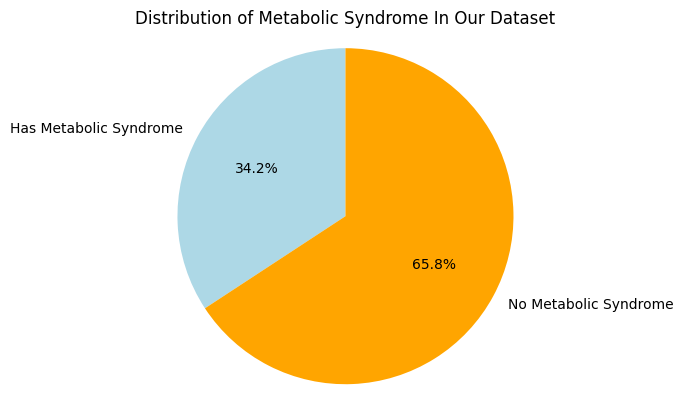

In [12]:
#get the categorical variable
count_1 = mb['MetabolicSyndrome'].tolist().count(1)
count_0 = mb['MetabolicSyndrome'].tolist().count(0)

#labels for the pie chart
labels = ['Has Metabolic Syndrome', 'No Metabolic Syndrome']

#values for each category
sizes = [count_1, count_0]

#colors for categories
colors = ['lightblue', 'orange']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Metabolic Syndrome In Our Dataset')
plt.show()

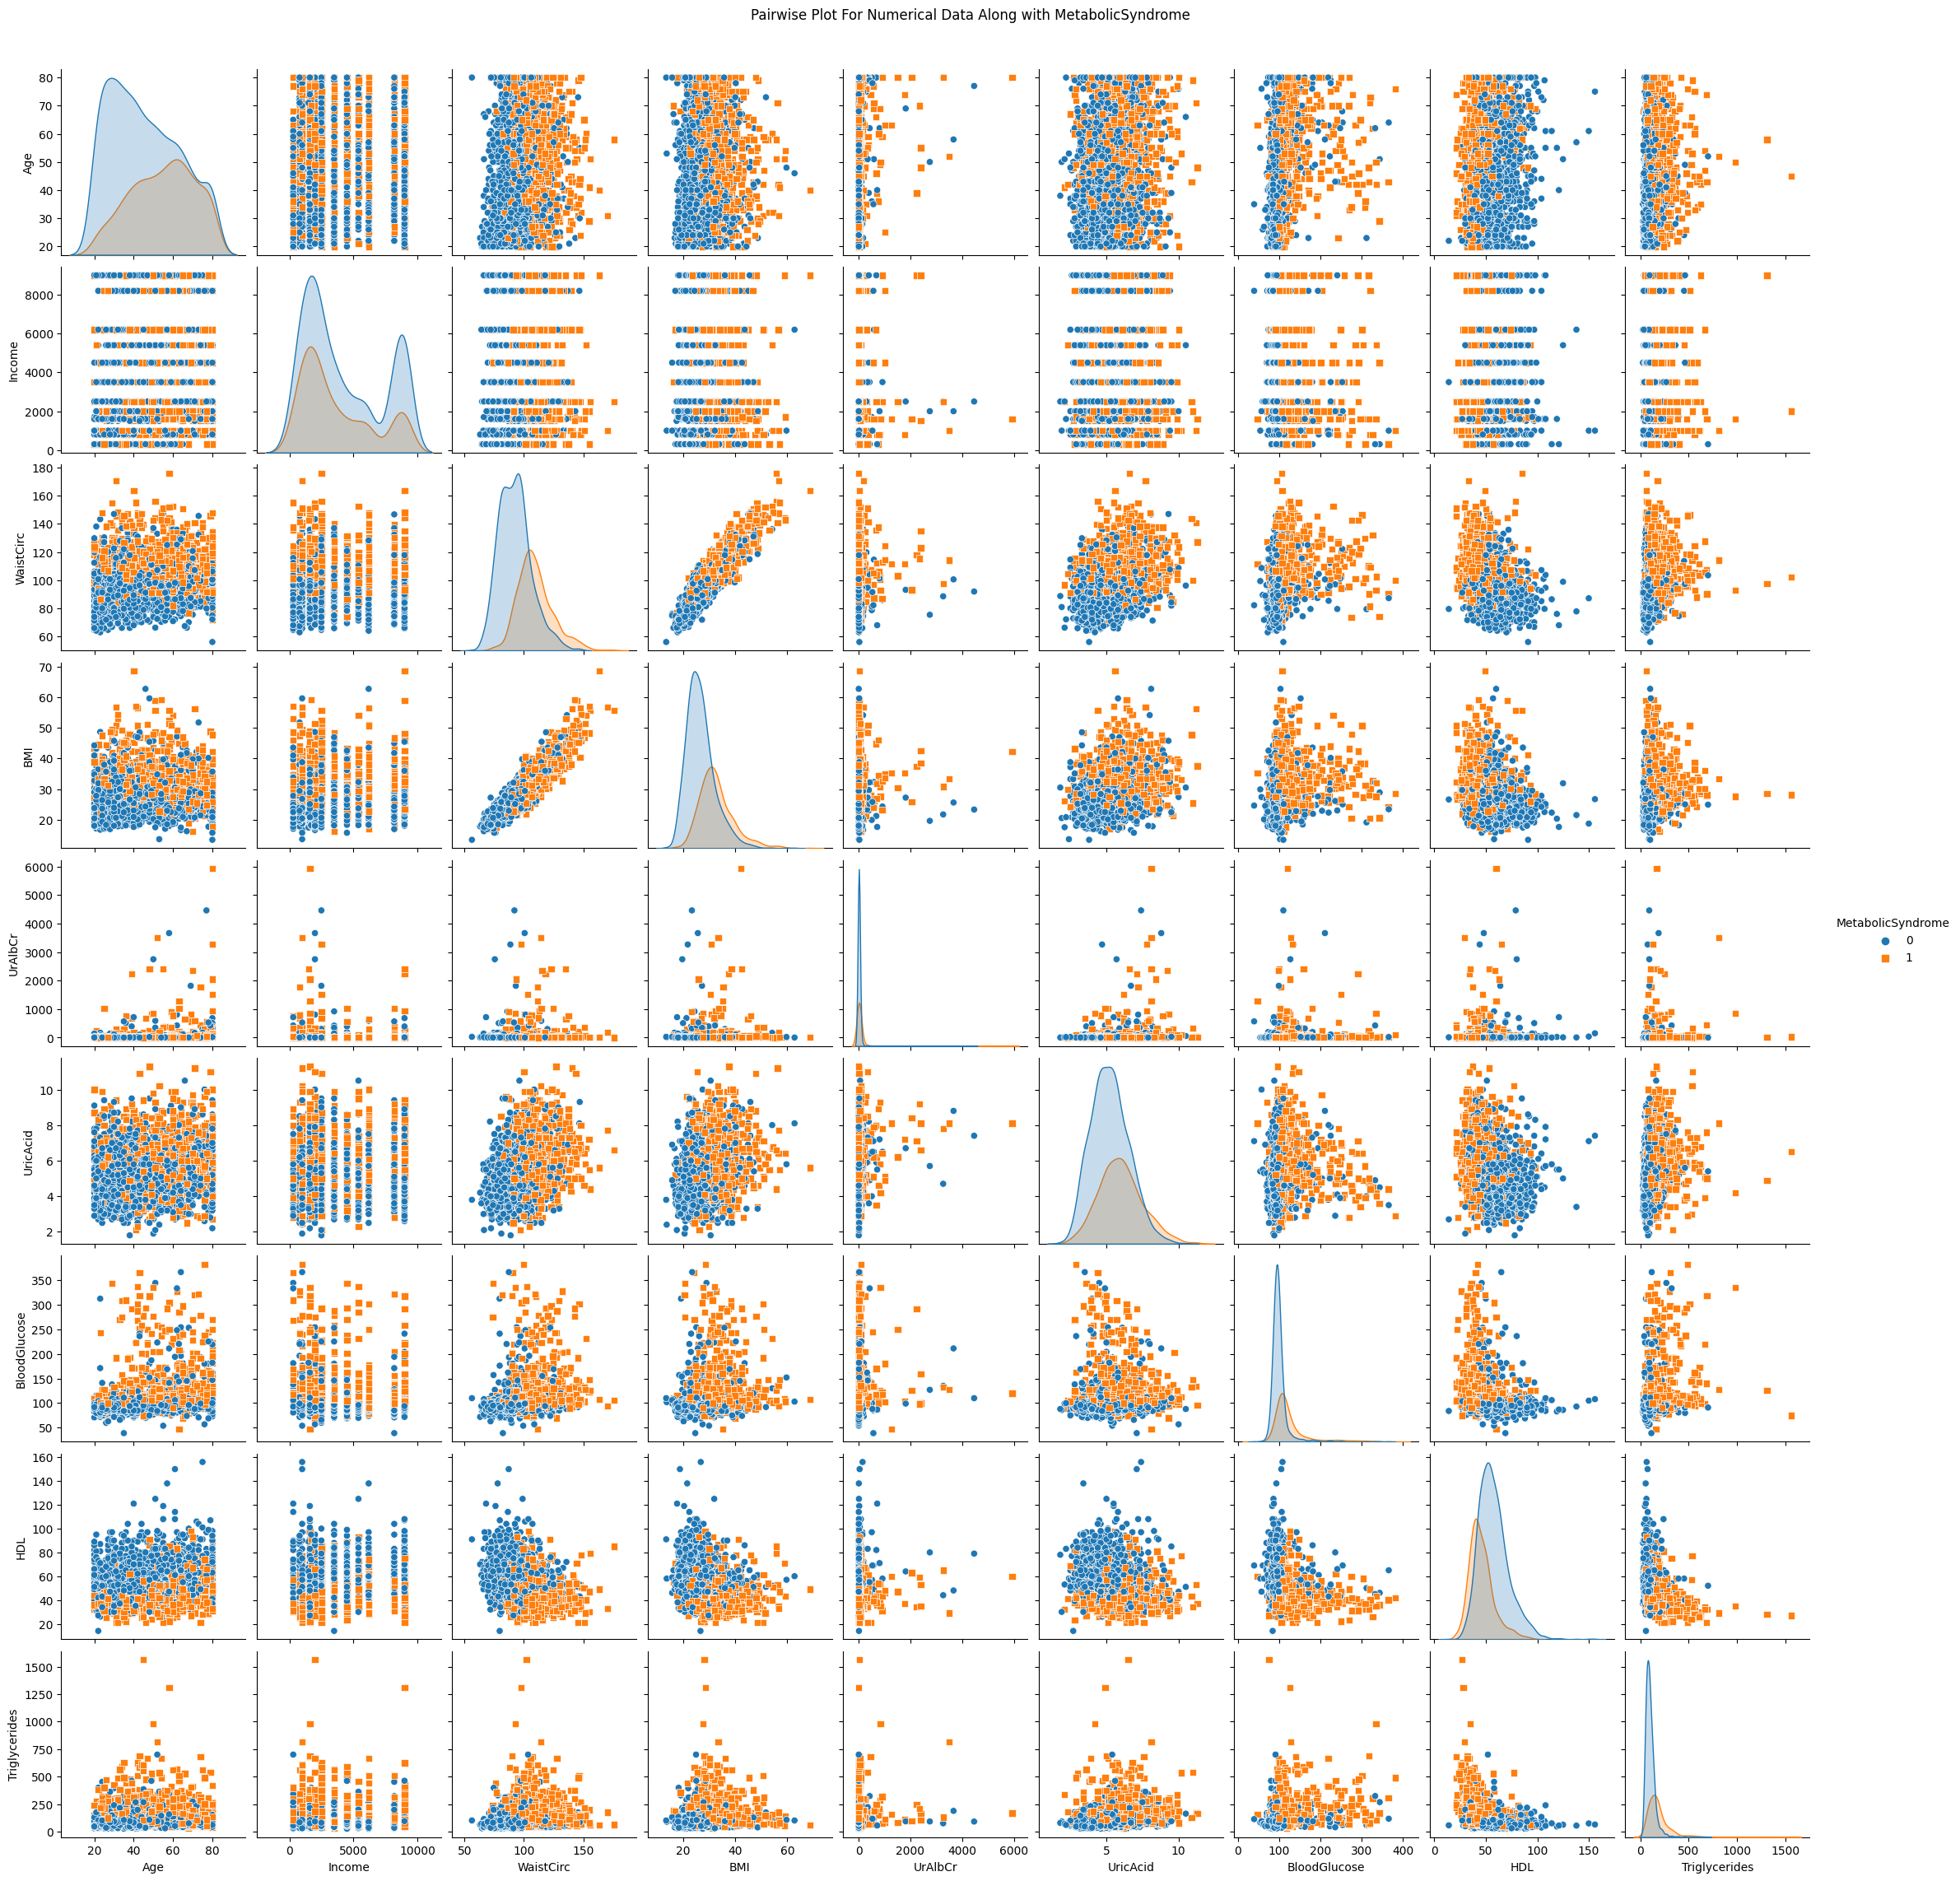

In [25]:
#pairwise plot for numerical columns
numerical_cols = ['Age', 'Income', 'WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides', 'MetabolicSyndrome']

numerical_data = mb[numerical_cols]

#pairwise plot for numerical features
sns.pairplot(mb[numerical_cols], hue='MetabolicSyndrome', markers=['o', 's'])

#show the plot
plt.suptitle("Pairwise Plot For Numerical Data Along with MetabolicSyndrome", y = 1.02)
plt.show()

ValueError: num must be an integer with 1 <= num <= 4, not 5

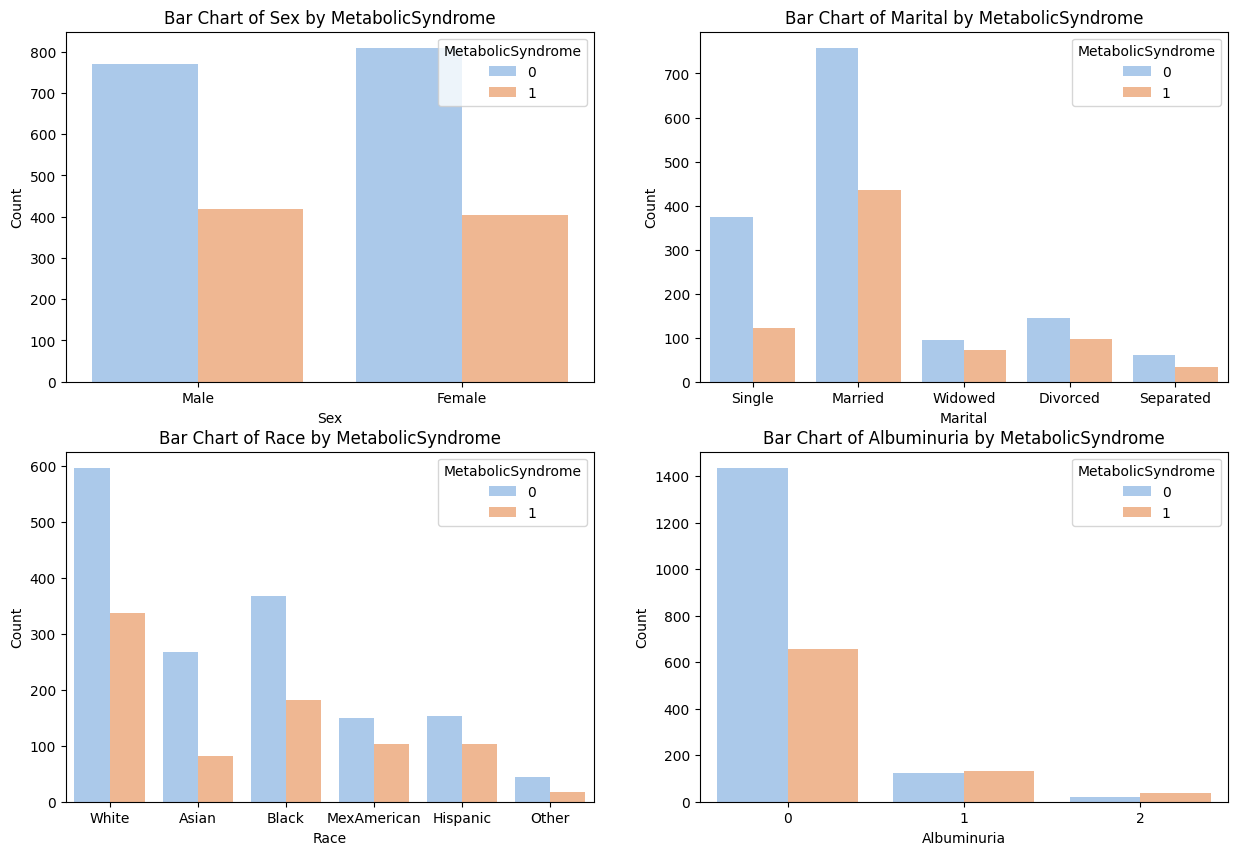

In [38]:
#bar charts for categorical columns by MetabolicSyndrome
categorical_cols = ['Sex', 'Marital', 'Race', 'Albuminuria',  'MetabolicSyndrome']

categorical_data = mb[categorical_cols]

#set up the grid
plt.figure(figsize=(15, 10))
grid_size = len(categorical_cols)

#loop through and create bar charts
for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(2, 2, i)
    sns.countplot(data=categorical_data, x=col, hue='MetabolicSyndrome', palette='pastel')
    plt.title(f'Bar Chart of {col} by MetabolicSyndrome')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='MetabolicSyndrome')

plt.tight_layout()
plt.show()


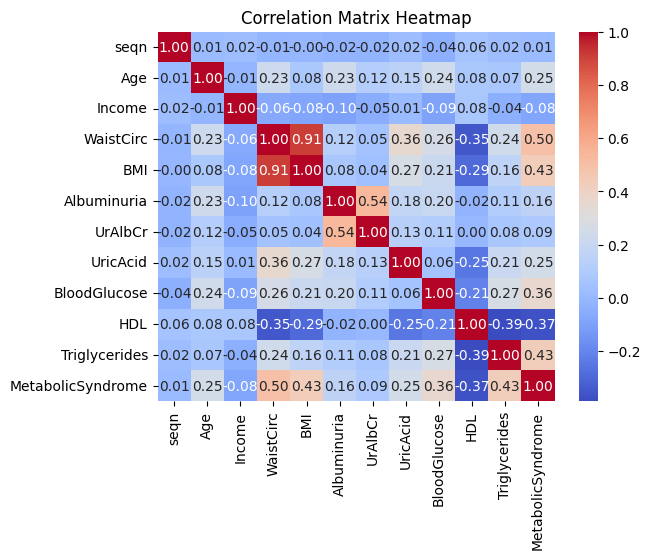

In [41]:
#select numerical columns
numerical_columns = mb.select_dtypes(include=['number'])

#make correlation matrix
correlation_matrix = numerical_columns.corr()

#plot it
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()